



## Ajuste de uma função por uma rede neural

Vamos verificar uma propriedade bem básica de redes neurais, a capacidade de elas aproximarem uma função $f(x)$.

Será uma função bem simples $y = x^2$, mas da pra aprender com ela uma série de coisas preliminares.

In [1]:
# Bibliotecas
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from matplotlib import pyplot as plt

## Coleta (geração) de dados

Inicialmente coletamos os dados, gerando valores para $x$ e $y$:

In [ ]:
# Conjunto de dados:
x = np.arange(-50,50)
y = x**2
print(x.min(), x.max(), y.min(), y.max())
# reshape no conjunto de dados
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

-50 49 0 2500


## Pré-processamento:

Aqui vamos ajustar os dados para uma forma mais adequada ao processamento de uma RNA, uma estratégia boa é normalizar valores de entrada e saída entre 0 e 1, isso pode ser feito pela função MinMaxScaler do pacote SKlearn.



In [ ]:
# Pré-processamento
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


# A rede neural

Agora deve-se pensar na estrutura da rede e codificá-la.

Uma RNA é um modelo Sequencial, que pode ser criado pelno Keras conforme segue.

A idéia é ir adicionando camadas da rede ao modelo.

Aqui cabe estudar a função sequencial, o método add, a camada densa (Dense) e a função de ativacão Relu.

No código a rede também é compilada, onde se define a sua função costo (loss) e o otimizador (adam), um google para cada um destes conceitos.

Por fun a rede é treinada com o método fit utilizando um certo número de épocas.

Recomendo trocar o indicador verbose de 0 para 1 so para ver a evolução do treinamento.

In [ ]:
# Estrutura da rede neural:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))


# Compila: Função custo e otimizador
model.compile(loss='mse', optimizer='adam')

# Treina a rede neural
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

# Validação (ou teste)

Aqui, com a rede treinada fazemos predições com o método predict, realizamos o escalonamento inverso nos dados e então mede-se o erro médio quadrático MSE.

In [ ]:
# Predições com a RNA:
yhat = model.predict(x)
# Transformação inversa:
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# Erro medido no modelo:
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

4/4 [==============================] - 0s 2ms/step
MSE: 2039.924


Um plot da função original e da função recuperada pela rede também é útil para visualizar o resultado.

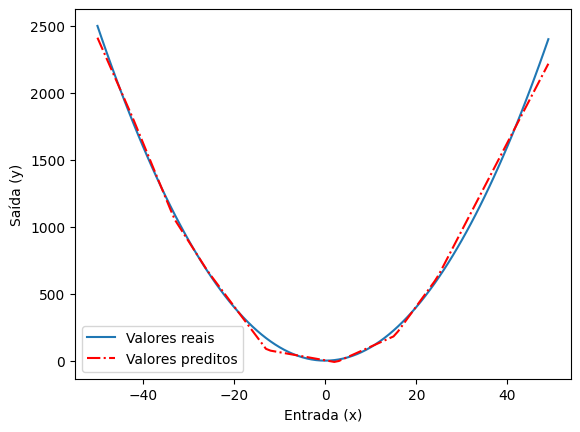

In [ ]:

# plot x vs y
plt.plot(x_plot,y_plot, label='Valores reais')
# plot x vs yhat
plt.plot(x_plot,yhat_plot, '-.r',label='Valores preditos')
plt.xlabel('Entrada (x)')
plt.ylabel('Saída (y)')
plt.legend()
plt.show()